# Project Overview
Prediction of mines/rocks on the sonar dataset. We start with a Decision Tree classifier model and evaluate it, then we improve performance through five steps. Improvement 1 was not successful.
# Improvment1: Train the Decision Tree Model with Entropy Criterrion
# Improvment2: Using GridSearchCV
# Improvment3: Using "Random Forest" algorithm
# Improvment4: Using My Inovation Senario: "Professional_Forest"
# Improvment5: Hyperparameter tuning on the "Professinal Forest"

# Final Conclusion:
# we have a very powerful, robust and fast model with highest performance

# The link of Dataset is: "https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks"

In [2]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
column_names = [f'Attribute_{i}' for i in range(1, 61)] + ['Class']
sonar_data = pd.read_csv(url, header=None, names=column_names)

sonar_data.head()

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,...,Attribute_52,Attribute_53,Attribute_54,Attribute_55,Attribute_56,Attribute_57,Attribute_58,Attribute_59,Attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_data.info()

Set Display Max Rows: Increase the maximum number of rows that pandas will display

In [4]:
pd.set_option('display.max_rows', None)


Check for Missing Values: After setting the display options, we can check for missing values.

In [ ]:
print(sonar_data.isnull().sum())


# Encode the Target Variable:
The target variable 'Class' contains categorical values ('M' for mines and 'R' for rocks). Use Label Encoder to convert these categorical values into numerical values(1 or 0)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sonar_data['Class'] = label_encoder.fit_transform(sonar_data['Class'])


# Step 2: Split the Data into Training and Testing Sets

Separate the features (X) and the target variable (y).

In [8]:
X = sonar_data.drop('Class', axis=1)
y = sonar_data['Class']

Split the dataset into training and testing sets using train_test_split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step3: Train the Decision Tree Model with Gini criterrion


In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Step 4: Predict and Evaluate the Model

# predict

In [11]:
y_pred = model.predict(X_test)



# Evaluate the Model:

> Add blockquote



In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional performance metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.85      0.63      0.72        35
           1       0.65      0.86      0.74        28

    accuracy                           0.73        63
   macro avg       0.75      0.74      0.73        63
weighted avg       0.76      0.73      0.73        63

[[22 13]
 [ 4 24]]


# Improvement1:
# Train the Decision Tree Model with Entropy criterrion

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
y_pred = model.predict(X_test)



#  Evaluate the Model:(with Entropy criterion)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional performance metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        35
           1       0.64      0.64      0.64        28

    accuracy                           0.68        63
   macro avg       0.68      0.68      0.68        63
weighted avg       0.68      0.68      0.68        63

[[25 10]
 [10 18]]


# Conclusion of Improvement1: (Model Improvement by Using Entropy)
The decline in performance suggests that the 'gini' criterion is be better suited for this dataset.
# Iprovement1 is not successful


# Improvment 2: using GridSearchCV
to systematically find the best combination of hyperparameters

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
column_names = [f'Attribute_{i}' for i in range(1, 61)] + ['Class']
sonar_data = pd.read_csv(url, header=None, names=column_names)

# Encode the target variable
label_encoder = LabelEncoder()
sonar_data['Class'] = label_encoder.fit_transform(sonar_data['Class'])

# Split the data into features and target variable
X = sonar_data.drop('Class', axis=1)
y = sonar_data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# View the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Accuracy: 0.74
Test Set Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.86      0.69      0.76        35
           1       0.69      0.86      0.76        28

    accuracy                           0.76        63
   macro avg       0.77      0.77      0.76        63
weighted avg       0.78      0.76      0.76        63

[[24 11]
 [ 4 24]]


# Conclusion of Improvement2:(using GridSearchCV)
the hyperparameter tuning improved the model's overall performance, as evidenced by the increased accuracy and more balanced precision, recall, and F1-scores. The tuned model with the best parameters (criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5) showed better performance in identifying both classes compared to the initial model.

This analysis demonstrates the value of hyperparameter tuning in optimizing the performance of machine learning models
# Iprovement2 is successful

# Improvement3: using Random Forest algorithm
we create a jungle with 100 decision_trees (n_estimator=100)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model with 100 trees
rf_model_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_100.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_rf_100 = rf_model_100.predict(X_test)

# Evaluate the model
accuracy_rf_100 = accuracy_score(y_test, y_pred_rf_100)
print(f"Random Forest (100 trees) Accuracy: {accuracy_rf_100:.2f}")
print(classification_report(y_test, y_pred_rf_100))
print(confusion_matrix(y_test, y_pred_rf_100))



Random Forest (100 trees) Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.83      0.89      0.86        28

    accuracy                           0.87        63
   macro avg       0.87      0.88      0.87        63
weighted avg       0.88      0.87      0.87        63

[[30  5]
 [ 3 25]]


# Conclusion of Improvement3: Random Forest
The Random Forest model with n_estimators=100 significantly outperforms the Decision Tree model with the best parameters found using GridSearchCV.

accuracy: Random_forest(0.87) > Decision_Tree_model (0.76)

percision class 0: 0.91 > 0.86
percision class 1: 0.83 > 0.69

Recall class 0: 0.86 > 0.69
Recall class 1: 0.86 > 0.83

F1_score class 0: 0.88 > 0.76
F1_score class 1: 0.86 > 0.76

 The ensemble method in Random Forest leverages the power of multiple trees to improve accuracy, precision, recall, and F1-score, making it a more robust and reliable model.
 # Iprovement3 is more successful

# Improvement4: By Using My Inovation Senario

# professional_forest

steps:
1. we create Random Forest model with n_estimators=1000,
2. select the top 100 trees(10%) based on trees performance
3. create a "professional forest" and train it on top 10% trees
4. evaluate "professional forest" performance.

 to see if we can achieve even better performance.


# Create, Train and Evaluate "Professional Forest" Model
we create primary_forest with 1000 trees and then select top 100 trees with highest performance.

In [4]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
column_names = [f'Attribute_{i}' for i in range(1, 61)] + ['Class']
sonar_data = pd.read_csv(url, header=None, names=column_names)

# Encode the target variable
label_encoder = LabelEncoder()
sonar_data['Class'] = label_encoder.fit_transform(sonar_data['Class'])

# Split the data into features and target variable
X = sonar_data.drop('Class', axis=1)
y = sonar_data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest with 1000 trees
rf_model_1000 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model_1000.fit(X_train, y_train)

# Evaluate the performance of each tree
individual_trees = rf_model_1000.estimators_
tree_performance = []
for i, tree in enumerate(individual_trees):
    # Ensure feature names are provided during prediction
    y_pred_tree = tree.predict(X_test.values)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    tree_performance.append((i, accuracy_tree))

# Sort trees by their performance
tree_performance.sort(key=lambda x: x[1], reverse=True)

# Select the top 100 trees
top_trees = [individual_trees[i] for i, _ in tree_performance[:100]]

# Create an ensemble with the top trees
best_trees_ensemble = VotingClassifier(estimators=[(f'tree_{i}', tree) for i, tree in enumerate(top_trees)], voting='hard')
best_trees_ensemble.fit(X_train.values, y_train.values)

# Evaluate the new ensemble
y_pred_best_ensemble = best_trees_ensemble.predict(X_test.values)
accuracy_best_ensemble = accuracy_score(y_test, y_pred_best_ensemble)
print(f"Professional Forest Model Accuracy: {accuracy_best_ensemble:.2f}")
print(classification_report(y_test, y_pred_best_ensemble))
print(confusion_matrix(y_test, y_pred_best_ensemble))


Professional Forest Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.89      0.86      0.87        28

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

[[32  3]
 [ 4 24]]


# Conclusion of Improvement4:  "Professional forest"

# Precision Consistency:

The fact that both classes (0 and 1) have the same precision score of 0.89 despite the class imbalance (35 samples for class 0 and 28 samples for class 1) indicates that the model is performing consistently across both classes. This is a positive sign, showing that the model is not biased towards one class over the other in terms of precision.

Balanced Precision:

Precision for Class 0: 0.89

Precision for Class 1: 0.89


The "Professional Forest" model with primary_forest with 1000 trees (n_estimators=1000) and select top 10% trees significantly outperforms the random_forest model with the 100 trees.

accuracy: Professional_forest_model(0.89) > random_forest_model (0.87)

percision class 0: 0.89 < 0.91
percision class 1: 0.89 > 0.83
#note1: precision for class 0 is less than Random Forest model but we have balanced precision for both classes (0 and 1)

Recall class 0: 0.91 > 0.86
Recall class 1: 0.86 < 0.89

F1_score class 0: 0.90 > 0.88
1_score class 1: 0.87 > 0.86

The "Professional Forest leverages the power of multiple expert trees to improve accuracy, precision, recall, and F1-score, making it a more robust and reliable model.

# Iprovement4
# by Using "Professional Forest" Model Improvment4 is more Successful and it has better Performance of Random Forest Model

# Improvement5: Hyperparameter tuning on the "Professinal Forest"
I will try, test different primary forest with different number of trees for finding best "professional forest".

to see if we can achieve even better performance.

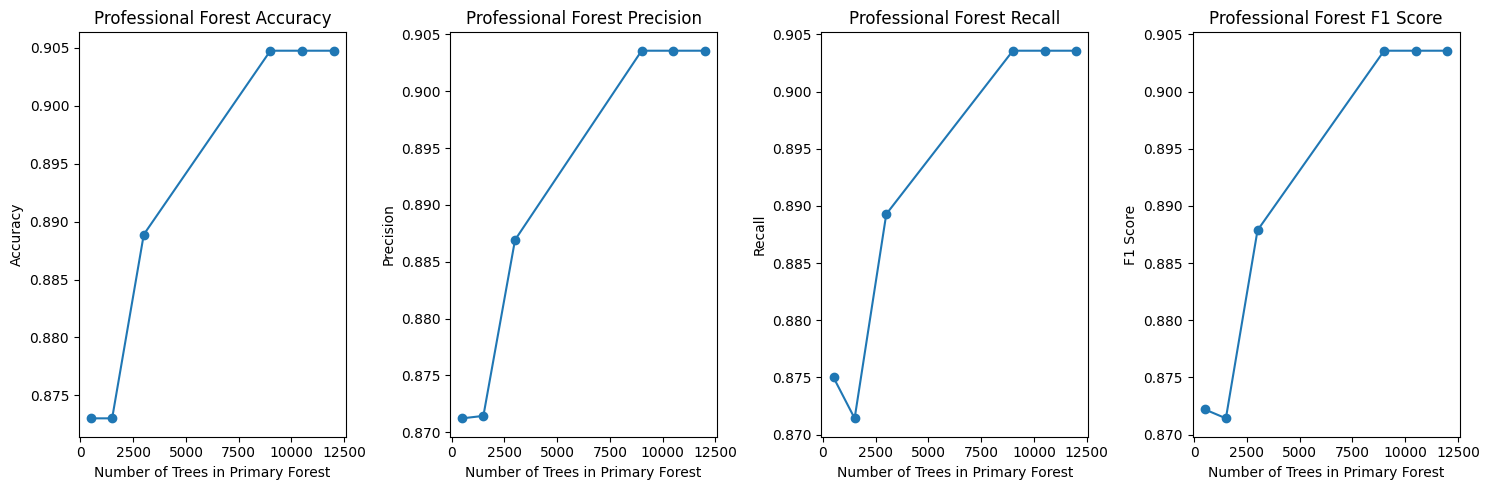

n_estimators_list is: [500, 1500, 3000, 9000, 10500, 12000]
performances are: [0.873015873015873, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048]
precision_scores are: [0.8712121212121212, 0.8714285714285714, 0.8869168356997972, 0.9035714285714286, 0.9035714285714286, 0.9035714285714286]
recall_scores are: [0.875, 0.8714285714285714, 0.8892857142857142, 0.9035714285714286, 0.9035714285714286, 0.9035714285714286]
F1_scores are: [0.8722109533468559, 0.8714285714285714, 0.8878718535469108, 0.9035714285714286, 0.9035714285714286, 0.9035714285714286]


In [3]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
column_names = [f'Attribute_{i}' for i in range(1, 61)] + ['Class']
sonar_data = pd.read_csv(url, header=None, names=column_names)

# Encode the target variable
label_encoder = LabelEncoder()
sonar_data['Class'] = label_encoder.fit_transform(sonar_data['Class'])

# Split the data into features and target variable
X = sonar_data.drop('Class', axis=1)
y = sonar_data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter exploration for the number of trees in the primary forest
n_estimators_list = [500, 1500, 3000, 9000, 10500, 12000]
performances = []
precision_scores = []
recall_scores = []
f1_scores = []

for n_estimators in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the performance of each tree
    individual_trees = rf_model.estimators_
    tree_performance = []
    for i, tree in enumerate(individual_trees):
        y_pred_tree = tree.predict(X_test.values)
        accuracy_tree = accuracy_score(y_test, y_pred_tree)
        tree_performance.append((i, accuracy_tree))

    tree_performance.sort(key=lambda x: x[1], reverse=True)
    top_trees = [individual_trees[i] for i, _ in tree_performance[:100]]

    best_trees_ensemble = VotingClassifier(estimators=[(f'tree_{i}', tree) for i, tree in enumerate(top_trees)], voting='hard')
    best_trees_ensemble.fit(X_train.values, y_train.values)

    y_pred_best_ensemble = best_trees_ensemble.predict(X_test.values)
    accuracy_best_ensemble = accuracy_score(y_test, y_pred_best_ensemble)
    performances.append(accuracy_best_ensemble)

    precision = precision_score(y_test, y_pred_best_ensemble, average='macro')
    recall = recall_score(y_test, y_pred_best_ensemble, average='macro')
    f1 = f1_score(y_test, y_pred_best_ensemble, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.plot(n_estimators_list, performances, marker='o')
plt.xlabel('Number of Trees in Primary Forest')
plt.ylabel('Accuracy')
plt.title('Professional Forest Accuracy')

plt.subplot(1, 4, 2)
plt.plot(n_estimators_list, precision_scores, marker='o')
plt.xlabel('Number of Trees in Primary Forest')
plt.ylabel('Precision')
plt.title('Professional Forest Precision')

plt.subplot(1, 4, 3)
plt.plot(n_estimators_list, recall_scores, marker='o')
plt.xlabel('Number of Trees in Primary Forest')
plt.ylabel('Recall')
plt.title('Professional Forest Recall')

plt.subplot(1, 4, 4)
plt.plot(n_estimators_list, f1_scores, marker='o')
plt.xlabel('Number of Trees in Primary Forest')
plt.ylabel('F1 Score')
plt.title('Professional Forest F1 Score')

plt.tight_layout()
plt.show()

print(f'n_estimators_list is: {n_estimators_list}')
print(f'performances are: {performances}')
print(f'precision_scores are: {precision_scores}')

print(f'recall_scores are: {recall_scores}')
print(f'F1_scores are: {f1_scores}')


# Conclusion of "Professional Forest" Hyperparameter Fine-Tune

We observed a trend of increasing performance with an increasing number of trees in the primary forest. However, there is an upper limit beyond which increasing the number of trees does not result in performance improvement.

For the best Professional Forest and optimal training mode, we select the Professional Forest created with 9000 trees. This model has the following performance:
# Accuracy = 0.904
# precision_score = 0.903
# recall_score = 0.903
# F1_score = 0.903

# Improvement5 is the best

# final conclusion
# Hyperparameter fine-tuning on the "Professional Forest" idea has enabled us to create a very robust and powerful model based on the Random Forest algorithm.